## H2O modo local

#### Inicialização

In [1]:
import h2o

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-win64) (build 25.121-b15, mixed mode)
  Starting server from C:\Users\alu201322578\AppData\Local\conda\conda\envs\Teste_aula\h2o_jar\h2o.jar
  Ice root: C:\Users\AL9449~1\AppData\Local\Temp\tmperl88t5b
  JVM stdout: C:\Users\AL9449~1\AppData\Local\Temp\tmperl88t5b\h2o_ALU201322578_started_from_python.out
  JVM stderr: C:\Users\AL9449~1\AppData\Local\Temp\tmperl88t5b\h2o_ALU201322578_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Sao_Paulo
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,4 months and 2 days !!!
H2O cluster name:,H2O_from_python_ALU201322578_pghwuz
H2O cluster total nodes:,1
H2O cluster free memory:,1.761 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


#### Carga dos dados de arquivo CSV

Este arquivo é uma amostra do do dataset original em formato Parquet.

A amostra foi de 5% do conteúdo original.

Após amostragem, os seguintes filtros foram aplicados:

- Distância (trip_distance) >= 1
- Meio de pagamento Cartão (payment_type = 1)
- 'Taxa Gorjeta' entre 0 e 0.99

In [8]:
h2o_nyc_data = h2o.import_file("../data/nyc_yellow_taxi_sample.csv.gz",
                               destination_frame="nyc_data",
                               header=1,
                               sep=",")

Parse progress: |█████████████████████████████████████████████████████████| 100%


##### Colunas disponíveis no H2OFrame:

In [9]:
h2o_nyc_data.col_names

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pulocationid',
 'dolocationid',
 'ratecodeid',
 'fare_amount',
 'extra',
 'mta_tax',
 'improvement_surcharge',
 'Tip_amount',
 'Tolls_amount',
 'Total_amount']

##### Dimensões do H2OFrame:

In [10]:
h2o_nyc_data.dim

[4487239, 14]

#### Criação de algumas features discutidas em aula

Todas as features abaixo utilizam operadores e funções disponíveis no H2O.

A conversão de 'dayOfWeek' para factor utiliza a abreviatura do dia da semana.

In [12]:
h2o_nyc_data['tip_rate'] = h2o_nyc_data['Tip_amount'] / h2o_nyc_data['Total_amount']

h2o_nyc_data['pickup_hour'] = h2o_nyc_data['tpep_pickup_datetime'].hour()
#dayOfWeek é uma função do h2o
h2o_nyc_data['pickup_weekday'] = h2o_nyc_data['tpep_pickup_datetime'].dayOfWeek().asfactor()

#### Um resumo do formato e conteúdo das variáveis.

**Vejam nos mínimos e máximos se existem valores que podem afetar o desempenho do modelo.**

In [13]:
h2o_nyc_data.describe()
#Verificar passenger_count pois tem minimo zero


Rows:4487239
Cols:17




,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pulocationid,dolocationid,ratecodeid,fare_amount,extra,mta_tax,improvement_surcharge,Tip_amount,Tolls_amount,Total_amount,tip_rate,pickup_hour,pickup_weekday
type,time,time,int,real,int,int,int,real,real,real,real,real,real,real,real,int,enum
mins,1230809501000.0,1230811121000.0,0.0,1.0,1.0,1.0,1.0,0.33,-10.6,0.0,0.0,0.0,0.0,0.33,0.0,0.0,
mean,1498508399688.337,1498509575197.6294,1.6091090757590576,3.8096985206270504,161.80084323567365,159.14128732612633,1.0456057722800087,15.671919784081028,0.370041069798156,0.4978416683399289,0.29999104126167836,3.1381111168805567,0.49643400095247914,20.480890794985633,0.15209084854915264,13.750892252451921,
maxs,1512061372000.0,1512146986000.0,192.0,183.7,265.0,265.0,99.0,465.5,10.0,11.4,0.3,110.0,95.76,552.57,0.49358341559723595,23.0,
sigma,9238355312.782312,9238409669.085747,1.2616635046544722,4.1146427999242965,65.59491392448841,71.37036450617535,0.2849347571494506,11.965825624516713,0.4875973754721276,0.0333168296742776,0.0016393723912689214,2.746178963080608,1.7949487333486154,15.563014992495331,0.05009760293882924,6.485928844692992,
zeros,0,0,5711,0,0,0,0,0,2144685,19474,134,177766,4126412,0,177766,167070,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,2017-11-25 10:50:58,2017-11-25 11:06:01,1.0,3.8,68.0,209.0,1.0,14.5,0.0,0.5,0.3,3.05,0.0,18.35,0.1662125340599455,10.0,Sat
1,2017-11-25 10:37:41,2017-11-25 10:48:01,1.0,1.28,162.0,163.0,1.0,8.5,0.0,0.5,0.3,1.86,0.0,11.16,0.16666666666666669,10.0,Sat
2,2017-11-25 10:56:28,2017-11-25 11:04:18,1.0,1.41,163.0,43.0,1.0,7.5,0.0,0.5,0.3,1.0,0.0,9.3,0.1075268817204301,10.0,Sat


#### Inspeção das variáveis

Acesse o H2O Flow pelo comando abaixo, visualize o H2OFrame 'nyc_data' e analise as distribuições das variáveis que compõe o dataset. Pelas distribuições, você identifica outros valores que podem interferir na qualidade do modelo? Pense em valores extremos e valores pouco freqüentes. E na nossa variável dependente, 'tip_rate', você considera que valores fora das faixas comuns são facilmente capturáveis por um modelo?

In [14]:
#nao vamos conseguir programar dentro do flow. mas é possível fazer as outras funcionalidades como criação do modelo,
#divisão dos dados e etc..
#clicar em frames e listará os frames criados no h2o
#ao clicar no frame original, não será possível visualizar as colunas novas
#clicando nos dataframes adicionais, estarão contidas as colunas novas.

#Isso ocorre pois os dataframes são imutáveis, dessa maneira ele cria novos porém sem perder a referência
#ao clicar nas colunas é possível ver um sumário, indicando minimo máximo e etc...
#é possível ver que o passenger_count tem quantidade de 102
h2o.flow()

#### Treino e avaliação de modelos de regressão com H2O

**Divisão em Treino, Teste e Validação.**

Se o treino for muito lento, sugiro a redução do dataset de Treino para .6 e Validação para 0.15. Qual deve ser o tamanho do dataset de Teste?

In [15]:
#trocado para 60% de treino, 25% de teste e 15% de validação
train, test, valid = h2o_nyc_data.split_frame(ratios=[.6, .25], seed=42)

#### Regressão Linear com GLM

Detalhes de algoritmo e parâmetros discutidos em aula: [link para documentação](http://docs.h2o.ai/h2o/latest-stable/h2o-docs/data-science/glm.html)

In [19]:
#Geração de um modelo de regressão linear
#Lambda irá fazer com que o modelo verifique os melhores parametros

from h2o.estimators.glm import *

taxi_regression = H2OGeneralizedLinearEstimator(family="gaussian", model_id="taxi_glm_regression",
                                                alpha=[0.01, 0.05, 0.5, 0.95], lambda_search=True, nlambdas=75, 
                                                remove_collinear_columns=True)

taxi_regression.train(y="tip_rate", 
                      x=['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
                         'Tolls_amount', 'pickup_hour', 'pickup_weekday'], 
                      training_frame=train,
                      validation_frame=valid)


glm Model Build progress: |███████████████████████████████████████████████| 100%


#### Detalhes do modelo

In [20]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [21]:
taxi_regression
#R² Indica a variância entre a média de distância do valor predito e o valor real

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  taxi_glm_regression


ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 0.0024946181493112215
RMSE: 0.04994615249757704
MAE: 0.03570634121131596
RMSLE: 0.04455336609310028
R^2: 0.006455861477070224
Mean Residual Deviance: 0.0024946181493112215
Null degrees of freedom: 2692509
Residual degrees of freedom: 2692496
Null deviance: 6760.428704382892
Residual deviance: 6716.784313201957
AIC: -8496838.350280475

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 0.0024926244871924436
RMSE: 0.04992619039334409
MAE: 0.035699676614240464
RMSLE: 0.04453992647396223
R^2: 0.006594209917148985
Mean Residual Deviance: 0.0024926244871924436
Null degrees of freedom: 673151
Residual degrees of freedom: 673138
Null deviance: 1689.054501722237
Residual deviance: 1677.915158802568
AIC: -2124802.591520659
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-07-10 20:31:36,0.000 sec,1,",26E0",1,0.0025108,0.0025092
,2018-07-10 20:31:37,0.199 sec,2,",23E0",2,0.0025096,0.0025079
,2018-07-10 20:31:37,0.346 sec,3,",2E0",2,0.0025085,0.0025068
,2018-07-10 20:31:37,0.483 sec,4,",18E0",2,0.0025077,0.0025059
,2018-07-10 20:31:37,0.603 sec,5,",16E0",2,0.0025070,0.0025052
---,---,---,---,---,---,---,---
,2018-07-10 20:31:41,4.275 sec,26,",12E-1",12,0.0024953,0.0024933
,2018-07-10 20:31:41,4.383 sec,27,",1E-1",13,0.0024951,0.0024931
,2018-07-10 20:31:41,4.500 sec,28,",91E-2",13,0.0024949,0.0024929
,2018-07-10 20:31:41,4.613 sec,29,",8E-2",14,0.0024948,0.0024928


##### Hiperparâmetros utilizados para Elastic Net

In [22]:
taxi_regression.summary()

GLM Model: summary



,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
,gaussian,identity,"Elastic Net (alpha = 0.01, lambda = 0.007103 )","nlambda = 75, lambda.max = 0.2624, lambda.min = 0.007103, lambda.1se = -1.0",14,13,30,py_12_sid_9656


#### Importância das variáveis do modelo

GLM utiliza o peso e sinal dos coeficientes.

Variable importance does not apply to GLM. Will use std_coef_plot() instead.


C:\Users\alu201322578\AppData\Local\conda\conda\envs\Teste_aula\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


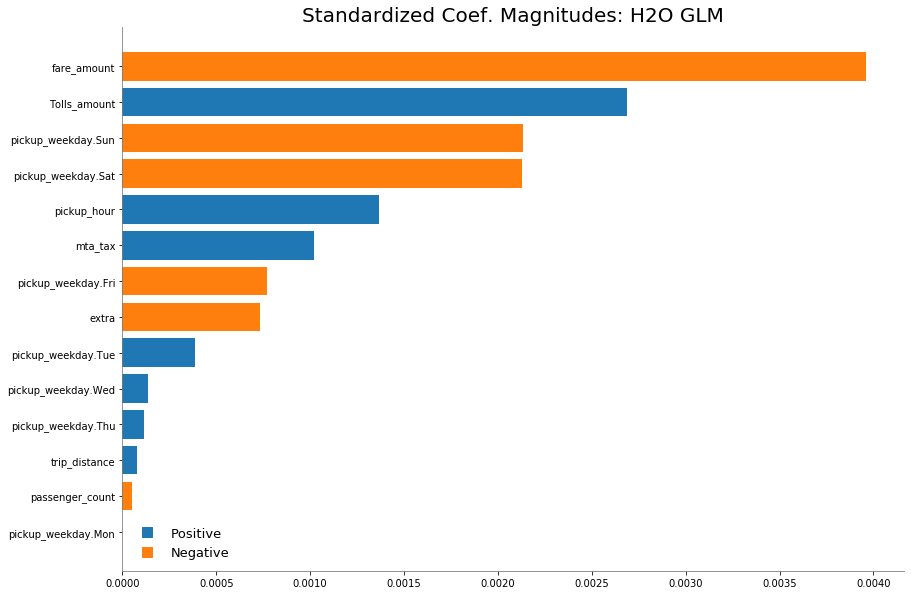

In [32]:
%matplotlib inline
taxi_regression.varimp_plot()

##### Performance (RMSE) no dataset de Testes

In [25]:
glm_taxi_perf = taxi_regression.model_performance(test)

glm_taxi_perf.rmse()

0.04991357893265516

**Capacidade explanatória** do modelo. Há muita variância por ser capturada para aumentar este resultado de R^2. 

Considere a criação de novas variáveis, remoção de variáveis em uso, e filtros de valores que podem estar aumentando muito a variância.

In [26]:
glm_taxi_perf.r2()

0.006468011068820001

In [27]:
from h2o.estimators.gbm import *

taxi_gbm_regression = H2OGradientBoostingEstimator(distribution="gaussian", model_id="taxi_gbm_regression",
                                                   ntrees=200, stopping_metric="rmse", stopping_rounds=7, stopping_tolerance=0.0001,
                                                   learn_rate=0.2, learn_rate_annealing=0.95,
                                                   max_depth=5, min_rows=2, col_sample_rate=0.95, sample_rate=0.7)  


In [28]:
taxi_gbm_regression.train(y="tip_rate", 
                          x=['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
                             'Tolls_amount', 'pickup_hour', 'pickup_weekday'], 
                          training_frame=train,
                          validation_frame=valid)


gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [29]:
taxi_gbm_regression

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  taxi_gbm_regression


ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.0024805518771631833
RMSE: 0.04980513906378722
MAE: 0.03556423982141847
RMSLE: 0.044428882125333274
Mean Residual Deviance: 0.0024805518771631833

ModelMetricsRegression: gbm
** Reported on validation data. **

MSE: 0.0024786611714940196
RMSE: 0.049786154415600525
MAE: 0.035555634611458845
RMSLE: 0.04441618554006372
Mean Residual Deviance: 0.0024786611714940196
Scoring History: 


,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
,2018-07-10 20:35:35,0.027 sec,0.0,0.0501082,0.0358574,0.0025108,0.0500916,0.0358536,0.0025092
,2018-07-10 20:35:38,3.404 sec,1.0,0.0500289,0.0358045,0.0025029,0.0500113,0.0357996,0.0025011
,2018-07-10 20:35:47,11.971 sec,14.0,0.0498280,0.0356045,0.0024828,0.0498061,0.0355944,0.0024807
,2018-07-10 20:35:53,18.556 sec,25.0,0.0498109,0.0355743,0.0024811,0.0497905,0.0355647,0.0024791
,2018-07-10 20:35:58,23.431 sec,34.0,0.0498051,0.0355642,0.0024806,0.0497862,0.0355556,0.0024787
,2018-07-10 20:36:02,27.663 sec,63.0,0.0498051,0.0355642,0.0024806,0.0497862,0.0355556,0.0024787
,2018-07-10 20:36:09,33.805 sec,106.0,0.0498051,0.0355642,0.0024806,0.0497862,0.0355556,0.0024787
,2018-07-10 20:36:17,42.484 sec,166.0,0.0498051,0.0355642,0.0024806,0.0497862,0.0355556,0.0024787
,2018-07-10 20:36:23,48.153 sec,200.0,0.0498051,0.0355642,0.0024806,0.0497862,0.0355556,0.0024787


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
fare_amount,105.9512482,1.0,0.4755758
pickup_hour,41.7861900,0.3943907,0.1875627
trip_distance,28.1924553,0.2660889,0.1265455
pickup_weekday,18.7004414,0.1765004,0.0839393
Tolls_amount,16.1370945,0.1523068,0.0724334
mta_tax,5.6750789,0.0535631,0.0254733
extra,5.6104870,0.0529535,0.0251834
passenger_count,0.7321982,0.0069107,0.0032866


In [30]:
taxi_gbm_regression.summary()

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,200.0,200.0,28778.0,0.0,5.0,0.85,1.0,32.0,6.18


Ao contrário do GLM, em GBM (e outros modelos) não temos a noção de sinal (positivo/negativo) pois não há relação monotônica entre a _feature_ e a variável resposta.

In [31]:
taxi_gbm_regression.varimp_plot()

`matplotlib` library is required for this function!


In [33]:
from h2o.grid.grid_search import H2OGridSearch

gbm_params = {'learn_rate': [0.005, 0.01, 0.05, 0.1],
              'max_depth': [3, 5, 8],
              'sample_rate': [0.7, 0.85, 1.0],
              'min_rows': [3, 5, 8, 13, 21],
              'col_sample_rate': [0.7, 0.8, 0.95, 1.0]}

# COMBINAÇÕES ALEATÓRIAS DURANTE 25 MINUTOS ATÉ UM MÁXIMO DE 15 MODELOS
gbm_strategy = {'strategy': "RandomDiscrete", 'max_models': 15, 'max_runtime_secs': 25 * 60}

gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator,
                         grid_id='gbm_grid_taxi',
                         hyper_params=gbm_params,
                         search_criteria=gbm_strategy)

gbm_grid.train(y="tip_rate", 
               x=['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
                  'Tolls_amount', 'pickup_hour', 'pickup_weekday'], 
               training_frame=train, validation_frame=valid,
               distribution="gaussian",  
               ntrees=200, stopping_metric="rmse", stopping_rounds=7, stopping_tolerance=0.0005, seed=42)


gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [34]:
gbm_grid_performance = gbm_grid.get_grid(sort_by='rmse', decreasing=False)
gbm_grid_performance

Hyper-Parameter Search Summary: ordered by increasing rmse



,col_sample_rate,learn_rate,max_depth,min_rows,sample_rate,model_ids,rmse
,0.95,0.05,8,13.0,0.85,gbm_grid_taxi_model_10,0.0497707
,0.7,0.05,8,13.0,0.7,gbm_grid_taxi_model_8,0.0497714
,1.0,0.1,8,21.0,0.85,gbm_grid_taxi_model_6,0.0497733
,0.95,0.05,5,3.0,0.7,gbm_grid_taxi_model_9,0.0497869
,0.8,0.1,5,21.0,1.0,gbm_grid_taxi_model_2,0.0497877
,0.7,0.05,5,5.0,1.0,gbm_grid_taxi_model_13,0.0497887
,0.8,0.01,8,13.0,0.85,gbm_grid_taxi_model_12,0.0497964
,0.95,0.05,3,5.0,0.85,gbm_grid_taxi_model_14,0.0498045
,1.0,0.01,8,8.0,1.0,gbm_grid_taxi_model_3,0.0498060
,0.95,0.01,5,5.0,0.85,gbm_grid_taxi_model_5,0.0498123


In [35]:
best_gbm_taxi = gbm_grid_performance.models[0]

gbm_taxi_perf = best_gbm_taxi.model_performance(test)

gbm_taxi_perf.rmse()

0.04976765286900136

<h1>Criação de variáveis solicitadas em aula:</h1>

In [36]:
h2o_nyc_data['TempoCorrida'] = ((h2o_nyc_data['tpep_dropoff_datetime'] - h2o_nyc_data['tpep_pickup_datetime']) / 1000) / 60
h2o_nyc_data['PartidaCategorical'] = h2o_nyc_data['pulocationid'].asfactor()
h2o_nyc_data['ChegadaCategorical'] = h2o_nyc_data['dolocationid'].asfactor()

In [40]:
train, test, valid = h2o_nyc_data.split_frame(ratios=[.6, .25], seed=42)

In [41]:
taxi_gbm_regression = H2OGradientBoostingEstimator(distribution="gaussian", model_id="taxi_gbm_regression",
                                                   ntrees=200, stopping_metric="rmse", stopping_rounds=7, stopping_tolerance=0.0001,
                                                   learn_rate=0.2, learn_rate_annealing=0.95,
                                                   max_depth=5, min_rows=2, col_sample_rate=0.95, sample_rate=0.7)  


In [42]:
taxi_gbm_regression.train(y="tip_rate", 
                          x=['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 
                             'Tolls_amount', 'pickup_hour', 'pickup_weekday', 'TempoCorrida', 'PartidaCategorical', 'ChegadaCategorical'], 
                          training_frame=train,
                          validation_frame=valid)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [ ]:
h2o.cluster().shutdown(prompt=False)